## Matplotlib Challenge

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [4]:
# Drop any duplicate rows
merged_df.drop_duplicates(["Mouse ID", "Timepoint"]).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
mice_count_check = merged_df["Mouse ID"].nunique()
mice_count_check

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
tumor_volume_mean = merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_median = merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance = merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_stdev = merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_sem = merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_reg_summary_df = pd.DataFrame({"Tumor Volume Mean" : tumor_volume_mean, 
                                      "Tumor Volume Median" : tumor_volume_median, 
                                      "Tumor Volume Variance" : tumor_volume_variance, 
                                     "Tumor Volume Standard Deviation" : tumor_volume_stdev, 
                                     "Tumor Volume SEM" : tumor_volume_sem}).round(2)

drug_reg_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [7]:
drug_regimen_data_points = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

x_axis = np.arange(len(drug_regimen_data_points))

drug_regimen_count_df = pd.DataFrame({"Drug Regimen" : drug_regimen_data_points})

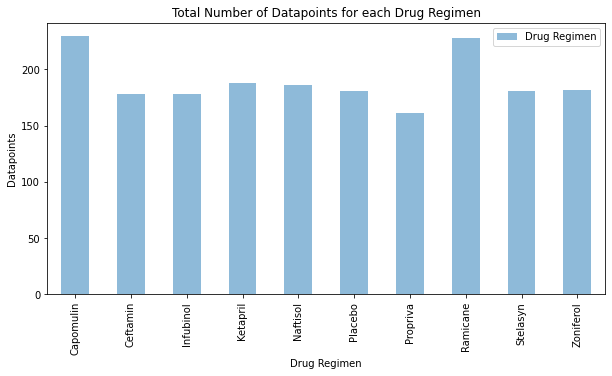

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_regimen_count_df.plot.bar(alpha = 0.5, align = "center", figsize = (10,5))

plt.title("Total Number of Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.savefig('Images/pandas_bar_plot.png', dpi = 72, bbox_inches = 'tight')

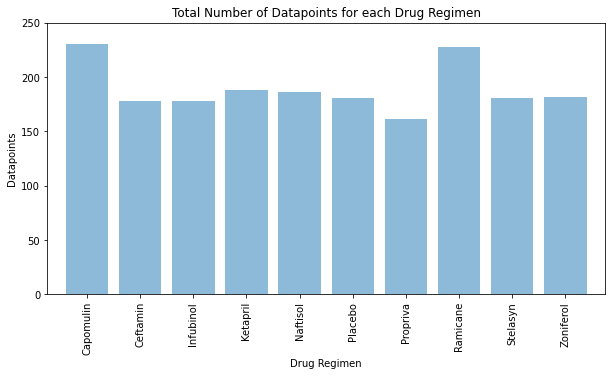

In [9]:
# General identical bar plot using pyplot instead of pandas.
plt.figure(figsize = (10,5))
plt.bar(x_axis, drug_regimen_data_points, alpha = 0.5, align = "center")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_regimen_data_points)+20)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen_count_df.index.values, rotation = "vertical")

plt.title("Total Number of Datapoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

plt.savefig('Images/plt_bar_plot.png', dpi = 72, bbox_inches = 'tight')

In [10]:
sex_distribution = merged_df.groupby(["Sex"]).count()["Mouse ID"]

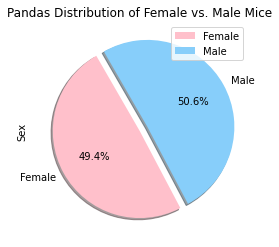

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution_df = pd.DataFrame({"Sex" : sex_distribution})

explode = (0, 0.1)
colors = ["pink", "lightskyblue"]


sex_distribution_df.plot.pie(y = 'Sex', explode = explode, shadow = True, colors = colors, autopct="%1.1f%%", 
                             title = "Pandas Distribution of Female vs. Male Mice", startangle = 120)

plt.savefig('Images/pandas_pie_plot.png', dpi = 72, bbox_inches = 'tight')

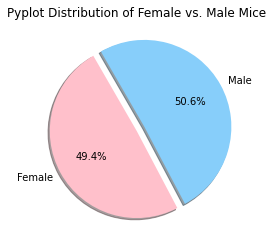

In [12]:
# Generate identical pie plot using pyplot
labels = ["Female", "Male"]

explode = (0, 0.1)

colors = ["pink", "lightskyblue"]

plt.pie(sex_distribution, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", 
        shadow = True, startangle = 120)

plt.title("Pyplot Distribution of Female vs. Male Mice")

plt.savefig('Images/plt_pie_plot.png', dpi = 72, bbox_inches = 'tight')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

new_merged_df = merged_df.set_index("Mouse ID")

some_drug_regimens_df = new_merged_df.loc[(new_merged_df["Drug Regimen"] == "Capomulin") | 
                                   (new_merged_df["Drug Regimen"] == "Ramicane") | 
                                   (new_merged_df["Drug Regimen"] == "Infubinol") |
                                   (new_merged_df["Drug Regimen"] == "Ceftamin"), :]

per_mouse = some_drug_regimens_df.groupby("Mouse ID")

final_tumor_volume = per_mouse['Tumor Volume (mm3)'].tail(1)

mouse_drug_regimen = per_mouse['Drug Regimen'].tail(1)

final_tumor_volume_per_mouse_df = pd.DataFrame({"Drug Regimen" : mouse_drug_regimen,
                                                "Final Tumor Volume" : final_tumor_volume})

final_tumor_volume_per_mouse_df.head()

,Drug Regimen,Final Tumor Volume
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.
capomulin_tumors = final_tumor_volume_per_mouse_df.loc[
    (final_tumor_volume_per_mouse_df["Drug Regimen"] == "Capomulin"), :]

quartiles = capomulin_tumors["Final Tumor Volume"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"The lower quartile for tumor volume for mice on the Capomulin drug regimen is: {lowerq}")
print(f"The upper quartile for tumor volume for mice on the Capomulin drug regimen is: {upperq}")
print(f"The interquartile range for tumor volume for mice on the Capomulin drug regimen is: {iqr}")
print(f"The the median for tumor volume for mice on the Capomulin drug regimen is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for tumor volume for mice on the Capomulin drug regimen is: 32.37735684
The upper quartile for tumor volume for mice on the Capomulin drug regimen is: 40.1592203
The interquartile range for tumor volume for mice on the Capomulin drug regimen is: 7.781863460000004
The the median for tumor volume for mice on the Capomulin drug regimen is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
ramicane_tumors = final_tumor_volume_per_mouse_df.loc[
    (final_tumor_volume_per_mouse_df["Drug Regimen"] == "Ramicane"), :]

quartiles = ramicane_tumors["Final Tumor Volume"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"The lower quartile for tumor volume for mice on the Ramicane drug regimen is: {lowerq}")
print(f"The upper quartile for tumor volume for mice on the Ramicane drug regimen is: {upperq}")
print(f"The interquartile range for tumor volume for mice on the Ramicane drug regimen is: {iqr}")
print(f"The the median for tumor volume for mice on the Ramicane drug regimen is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for tumor volume for mice on the Ramicane drug regimen is: 31.56046955
The upper quartile for tumor volume for mice on the Ramicane drug regimen is: 40.65900627
The interquartile range for tumor volume for mice on the Ramicane drug regimen is: 9.098536719999998
The the median for tumor volume for mice on the Ramicane drug regimen is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
infubinol_tumors = final_tumor_volume_per_mouse_df.loc[
    (final_tumor_volume_per_mouse_df["Drug Regimen"] == "Infubinol"), :]

quartiles = infubinol_tumors["Final Tumor Volume"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"The lower quartile for tumor volume for mice on the Infubinol drug regimen is: {lowerq}")
print(f"The upper quartile for tumor volume for mice on the Infubinol drug regimen is: {upperq}")
print(f"The interquartile range for tumor volume for mice on the Infubinol drug regimen is: {iqr}")
print(f"The the median for tumor volume for mice on the Infubinol drug regimen is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for tumor volume for mice on the Infubinol drug regimen is: 54.04860769
The upper quartile for tumor volume for mice on the Infubinol drug regimen is: 65.52574285
The interquartile range for tumor volume for mice on the Infubinol drug regimen is: 11.477135160000003
The the median for tumor volume for mice on the Infubinol drug regimen is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
ceftamin_tumors = final_tumor_volume_per_mouse_df.loc[
    (final_tumor_volume_per_mouse_df["Drug Regimen"] == "Ceftamin"), :]

quartiles = ceftamin_tumors["Final Tumor Volume"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"The lower quartile for tumor volume for mice on the Ceftamin drug regimen is: {lowerq}")
print(f"The upper quartile for tumor volume for mice on the Ceftamin drug regimen is: {upperq}")
print(f"The interquartile range for tumor volume for mice on the Ceftamin drug regimen is: {iqr}")
print(f"The the median for tumor volume for mice on the Ceftamin drug regimen is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for tumor volume for mice on the Ceftamin drug regimen is: 48.72207785
The upper quartile for tumor volume for mice on the Ceftamin drug regimen is: 64.29983003
The interquartile range for tumor volume for mice on the Ceftamin drug regimen is: 15.577752179999997
The the median for tumor volume for mice on the Ceftamin drug regimen is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


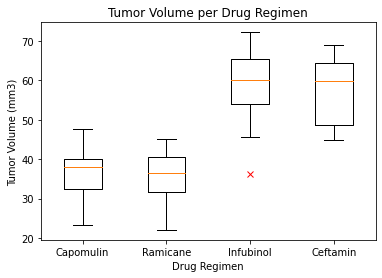

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
fig1, ax1 = plt.subplots()

tumors_by_drug_regimen = [capomulin_tumors["Final Tumor Volume"], ramicane_tumors["Final Tumor Volume"], 
            infubinol_tumors["Final Tumor Volume"], ceftamin_tumors["Final Tumor Volume"]]

ax1.set_title('Tumor Volume per Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumors_by_drug_regimen, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin",], sym = "rx")

plt.savefig('Images/plt_box_plot.png', dpi = 72, bbox_inches = 'tight')

plt.show()

## Line and Scatter Plots

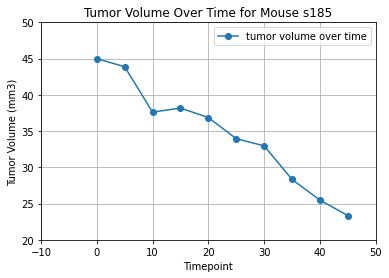

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
s185_capomulin_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") 
                                       & (merged_df["Mouse ID"] == "s185"), :]

s185_tumor_vol = s185_capomulin_df["Tumor Volume (mm3)"]
s185_time_point = s185_capomulin_df["Timepoint"]

s185_line_plot = plt.plot(s185_time_point, s185_tumor_vol, marker = "o", label = "tumor volume over time")

plt.legend(loc = "upper right")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse s185")

plt.xlim(-10, 50)
plt.ylim(20, 50)

plt.grid()

plt.savefig('Images/line_plot.png', dpi = 72, bbox_inches = 'tight')

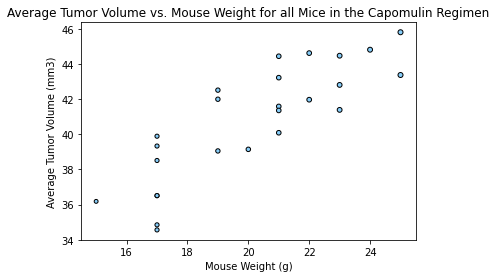

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_only_df = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin"), :]

avg_tumor_volume = capomulin_only_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

mouse_weight = capomulin_only_df.groupby(["Mouse ID"]).mean()["Weight (g)"]

x_axis = mouse_weight
y_axis = avg_tumor_volume

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = x_axis, alpha = 1)

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for all Mice in the Capomulin Regimen")

plt.savefig('Images/scatter_plot.png', dpi = 72, bbox_inches = 'tight')

## Correlation and Regression

The correlation coefficient for mouse weight versus average tumor volume is 0.84.


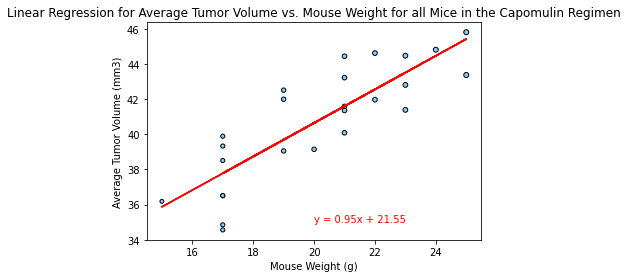

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis, y_axis)

print(f"The correlation coefficient for mouse weight versus average tumor volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightskyblue", edgecolors = "black", s = x_axis, alpha = 1)

plt.plot(x_axis, regress_values, "r-")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Linear Regression for Average Tumor Volume vs. Mouse Weight for all Mice in the Capomulin Regimen")

plt.annotate(line_eq,(20,35), fontsize = 10, color = "red")

plt.savefig('Images/linear_regression.png', dpi = 72, bbox_inches = 'tight')

plt.show()

# Observations and Insights

* Looking at the box plot of tumor volume in the Capomulin, Ramicane, Infubinol and Ceftamin drug regimens, Capomulin and Ramicane were both able to decrease tumor volumes to a lesser volume than Infubinol or Ceftamin.
* Based off the line graph created for a single mouse in the Capomulin drug regimen, it can be said that for this specific mouse, the Capomulin drug had a positive effect on tumor growth in the mouse. The graph shows that over the 45-day study period, the volume of the tumor generally decreased, with only one instance of the tumor having a greater volume at a later timepoint than the last. 
* The scatter plot shows us that, at least for the mice within the Capomulin regimen, average tumor volume is somewhat proportional to weight. 